# Archaic Techniques of Text Representation

#### There are four major types doing text represenatation with archaic techniques:
1. One Hot Encoding
2. Bag of Words
3. N-Grams
4. TF-IDF Representation

#### We'll discuss each of them separately here. Also we'll try to vizualize it.

## One Hot Encoding

Archaic Techniques is mostly about making a sparse matrix to represent a document with 0s and 1s.

One Hot Encoding is majourly about treating each word as a category and make a sparse vector to represent each vector.
In the book we see how its done. Now lets dig code for this.

In [1]:
# To get things started lets use one of most used python library Scikit-Learn

# Some really basic libraries you'll always need
import numpy as np
import os
import sys

# To do some simple vizulization lets use matplotlib
%matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE


Using matplotlib backend: MacOSX


In [2]:
# Scikit-learn (imports as sklearn) has standard implementation for our task in hand lets use it
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [15]:
# Some dummy data
S1 = 'What is One Hot Encoding'
S2 = 'Its a Archaic Technique'
S3 = 'So One Hot is Archaic'
S4 = 'Then what is Technique'

# Now a rule of thumb we mostly dont want same words to be repeated with and without capital.
# Hence we either convert them to uppercase or lower case

# Also as explained in text we would treat each wor as category so we'll split the data and make array accordingly

data = [S1.lower().split(), # .lower() convert string to lower case and .split() splits string with space delimeter 
       S2.lower().split(),
       S3.lower().split(),
       S4.lower().split()]

In [16]:
# Lets look as data
data
# As one can observer all words as lower cased and multidimentional array has been generated of string

[['what', 'is', 'one', 'hot', 'encoding'],
 ['its', 'a', 'archaic', 'technique'],
 ['so', 'one', 'hot', 'is', 'archaic'],
 ['then', 'what', 'is', 'technique']]

In [17]:
# Making a numpy array to make it consumable for other libraries
values = np.array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)



[['what', 'is', 'one', 'hot', 'encoding']
 ['its', 'a', 'archaic', 'technique'] ['so', 'one', 'hot', 'is', 'archaic']
 ['then', 'what', 'is', 'technique']]
[3 0 1 2]
[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]



## Bag of Words

As from above snippet it can be seen there is loss of information while encoding and other cons. Hence to recover much from that we use Bag of Words trick. Let's See how it gets implemented.

In [22]:
# Using scikit-learns CountVectorizer for this
from sklearn.feature_extraction.text import CountVectorizer

# It dosent need data to be splitted. It just need strings (/documents) as rows.
data = [S1, S2, S3, S4]

# Initiating Count Vectorizer
count_vect = CountVectorizer()

# Fitting data in the vectorizer
count_vect.fit(data)

# transforming data based on fitted vectorizer
vectorized = count_vect.transform(data)

# Some stats
print(vectorized.shape)
print(count_vect.get_feature_names())
print(vectorized.toarray())


(4, 10)
['archaic', 'encoding', 'hot', 'is', 'its', 'one', 'so', 'technique', 'then', 'what']
[[0 1 1 1 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 1 0 0]
 [1 0 1 1 0 1 1 0 0 0]
 [0 0 0 1 0 0 0 1 1 1]]


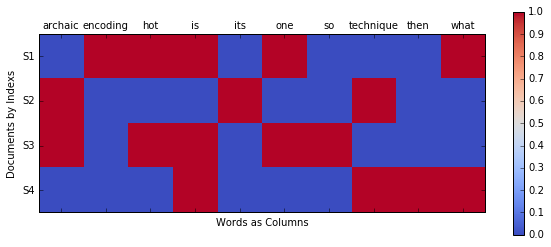

In [47]:
# lets see a small plot of this
plt.matshow(vectorized.toarray(), cmap='coolwarm', origin='upper')
plt.ylabel('Documents by Indexs')
plt.xlabel('Words as Columns')
plt.yticks(np.arange(4),['S1','S2','S3','S4'])
plt.xticks(np.arange(len(count_vect.get_feature_names())),count_vect.get_feature_names())
plt.colorbar()

There are only two colors and the reason with Blue:0 and Red:1. Hence it is equivalent to matrix above.

Lets add new data and see how things change.

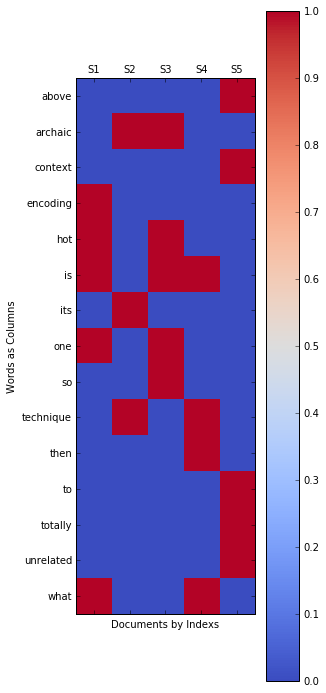

In [56]:
# New Data
S5 = 'Totally Unrelated to context above'

# Data
data = [S1, S2, S3, S4, S5]

# Initiating Count Vectorizer Again
count_vect = CountVectorizer()

# Fitting new data in the vectorizer
count_vect.fit(data)

# Transforming data based on fitted vectorizer
vectorized = count_vect.transform(data)

# Making plot of the newly fitted count vectorizer
plt.matshow(vectorized.toarray().T, cmap='coolwarm', origin='upper' )
plt.xlabel('Documents by Indexs')
plt.ylabel('Words as Columns')
plt.xticks(np.arange(5),['S1','S2','S3','S4','S5'])
plt.yticks(np.arange(len(count_vect.get_feature_names())),count_vect.get_feature_names())
plt.colorbar()

# This plot is made transposed to get a better view of the matrix

## N - Grams

The Bag of Words is better representation than One Hot encoding, but it losses a very basic behaviour of language.

Any Clues on this...??

If you guessed it right then it the sequence behaviour i.e we loose the information about which word is preceded and succeeded by which word.

To solve this we do a simple trick. We just make new columns with sequential combination of words.
Ex: 
For sentence: *'I like doing python'* 
* 1/Uni - Gram:  *'I', 'like', 'doing', python'* (equivalent to Bag of Words)
* 2/Bi   - Gram: *'I like', 'like doing', 'doing python'*
* 3/Tri - Gram:  *'I like doing', 'like doing python'*

Similary you cna make any positive value Ngram given the documents/strings are longer than that.

Lets see this with above strings


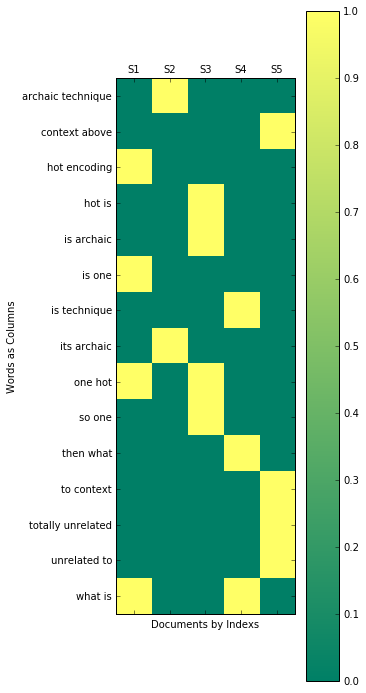

In [67]:
# Data
data = [S1, S2, S3, S4, S5]

# Initiating Count Vectorizer Again
count_vect = CountVectorizer(ngram_range=(2,2))

# Fitting new data in the vectorizer
count_vect.fit(data)

# Transforming data based on fitted vectorizer
vectorized = count_vect.transform(data)

# Making plot of the newly fitted count vectorizer
plt.matshow(vectorized.toarray().T, cmap='summer', origin='upper' )
plt.xlabel('Documents by Indexs')
plt.ylabel('Words as Columns')
plt.xticks(np.arange(5),['S1','S2','S3','S4','S5'])
plt.yticks(np.arange(len(count_vect.get_feature_names())),count_vect.get_feature_names())
plt.colorbar()

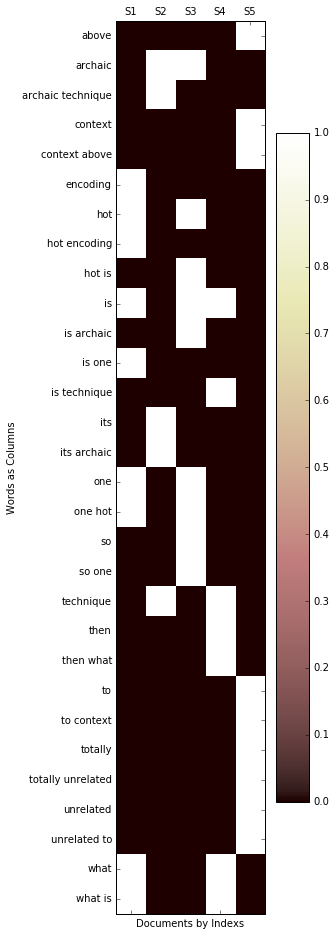

In [66]:
# Data
data = [S1, S2, S3, S4, S5]

# Initiating Count Vectorizer Again
count_vect = CountVectorizer(ngram_range=(1,2))

# Fitting new data in the vectorizer
count_vect.fit(data)

# Transforming data based on fitted vectorizer
vectorized = count_vect.transform(data)

# Making plot of the newly fitted count vectorizer
plt.matshow(vectorized.toarray().T, cmap='pink', origin='upper' )
plt.xlabel('Documents by Indexs')
plt.ylabel('Words as Columns')
plt.xticks(np.arange(5),['S1','S2','S3','S4','S5'])
plt.yticks(np.arange(len(count_vect.get_feature_names())),count_vect.get_feature_names())
plt.colorbar()

# TF-IDF

Now from all above representations we have got that we can hold words and set of sequence of words as features/coulmns. But lets think is it always viable to fill matrix with 0 and 1. 

Thinking probabilistically the more occuring words will always bias the behaviour. But for any so called NLP task we want to know how one document/string is different from other. hence we sould reduce the weightage of such words which occur in every document.

This is the theory behind TF-IDF. We penalize those features which occur in every data and hence give weightage to words which makes the differetiating tow documents possible.

Lets dive in the code now.

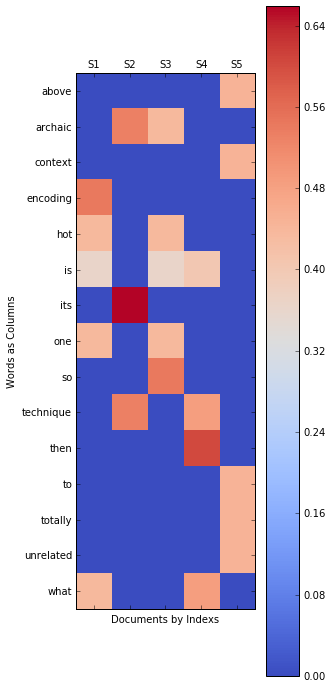

In [59]:
# 
from sklearn.feature_extraction.text import TfidfVectorizer

# Data
data = [S1, S2, S3, S4, S5]

# Initiating Count Vectorizer Again
tfidf_vect = TfidfVectorizer()

# Fitting new data in the vectorizer
tfidf_vect.fit(data)

# Transforming data based on fitted vectorizer
vectorized = tfidf_vect.transform(data)

# Making plot of the newly fitted count vectorizer
plt.matshow(vectorized.toarray().T, cmap='coolwarm', origin='upper' )
plt.xlabel('Documents by Indexs')
plt.ylabel('Words as Columns')
plt.xticks(np.arange(5),['S1','S2','S3','S4','S5'])
plt.yticks(np.arange(len(tfidf_vect.get_feature_names())),tfidf_vect.get_feature_names())
plt.colorbar()

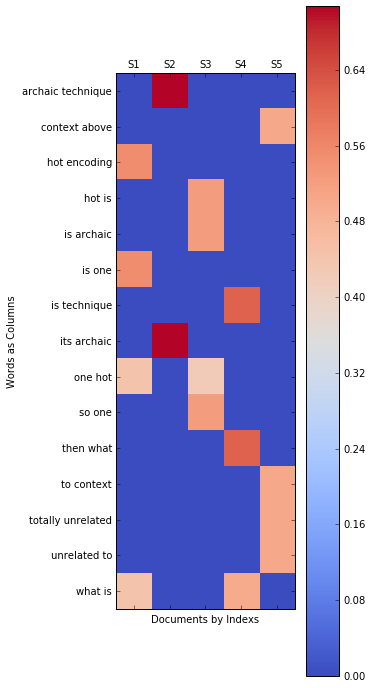

In [60]:
# Data
data = [S1, S2, S3, S4, S5]

# Initiating Count Vectorizer Again
tfidf_vect = TfidfVectorizer(ngram_range=(2,2))

# Fitting new data in the vectorizer
tfidf_vect.fit(data)

# Transforming data based on fitted vectorizer
vectorized = tfidf_vect.transform(data)

# Making plot of the newly fitted count vectorizer
plt.matshow(vectorized.toarray().T, cmap='coolwarm', origin='upper' )
plt.xlabel('Documents by Indexs')
plt.ylabel('Words as Columns')
plt.xticks(np.arange(5),['S1','S2','S3','S4','S5'])
plt.yticks(np.arange(len(tfidf_vect.get_feature_names())),tfidf_vect.get_feature_names())
plt.colorbar()

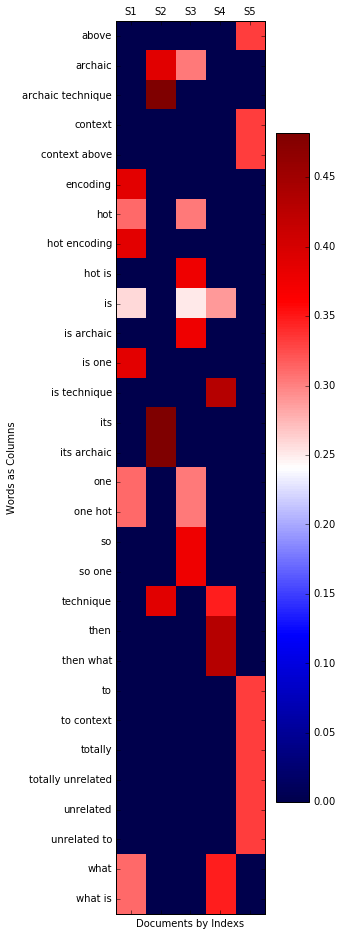

In [63]:
# Data
data = [S1, S2, S3, S4, S5]

# Initiating Count Vectorizer Again
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))

# Fitting new data in the vectorizer
tfidf_vect.fit(data)

# Transforming data based on fitted vectorizer
vectorized = tfidf_vect.transform(data)

# Making plot of the newly fitted count vectorizer
plt.matshow(vectorized.toarray().T, cmap='seismic', origin='upper' )
plt.xlabel('Documents by Indexs')
plt.ylabel('Words as Columns')
plt.xticks(np.arange(5),['S1','S2','S3','S4','S5'])
plt.yticks(np.arange(len(tfidf_vect.get_feature_names())),tfidf_vect.get_feature_names())
plt.colorbar()